# Hands-On Lab: Distribution of Superluminal Velocities in Quasars

In certain radio-loud quasars, astronomers observe apparent superluminal motion.
I.e., jet components that appear to move *faster than light* in the plane of the sky.
This effect is explained by relativistic beaming plus light-travel-time*geometry, not an actual violation of relativity.
In this lab, you will:

1. **Model** a population of quasar jets launched at speed $\beta c$ in random directions.
2. **Compute** each jet's apparent transverse velocity $\beta' \equiv v'/c$.
3. **Compare** your empirical distribution of $\beta'$ with a known theoretical result.
4. **Estimate** mean values and build confidence intervals, tying in concepts from parameter estimation.
5. **Explore** possible bias if only jets above some detection threshold are "observed".

This exercise demonstrates how **random orientation** plus **relativistic speeds** yield "superluminal" expansions in a statistical sample, and how the distribution is theoretically predictable.

## Physical Recap

A quasar jet moving at speed $v$ at an angle $\theta$ to our line of sight can show apparent velocity:
\begin{align}
v' &= \frac{d_\perp}{\Delta t} = \frac{v\sin\theta}{1 - (v/c)\cos\theta}
\end{align}
Note that although a $v/c$ term appears in this expression, the eﬀect is not a relativistic eﬀect.
It is just due to light delay and the viewing geometry.
Let $\beta = v/c$ and $\beta' = v'/c$,
\begin{align}
\beta' &= \frac{\beta\sin\theta}{1 - \beta\cos\theta}
\end{align}

Note that the apparent transverse speed $\beta'$ has a maximum value when
\begin{align}
\frac{\partial\beta'}{\partial\theta} = - \frac{\beta(\beta-\cos\theta)}{(1 - \beta\cos\theta)^2} = 0.
\end{align}
Hence, $\beta = \cos\theta$ at maximum.
Define $\gamma = (1 - \beta^2)^{-1/2}$, we have $1/\gamma = \sin\theta$ at the maximum.
Therefore,
\begin{align}
\beta' = \gamma\beta
\end{align}
where $\gamma$ can be much larger than unity.

## Distribution

Given a randomly oriented sample of radio sources, what is the distribution of $\beta'$ if $\beta$ is fixed?

In a random 3D orientation scenario, we want uniform distribution over solid angle $d\Omega = \sin\theta d\theta d\phi$.
Integrate over $d\phi$, it is clear that
\begin{align}
p(\theta) = \sin\theta \quad 0 \le \theta \le \pi/2.
\end{align}
The range is chosen because in standard models, the nucleus always eject blobs in two opposite directions.
And we are modeling the one blob that travels toward the observator.

Therefore,
\begin{align}
  p(\beta') 
  &= p(\theta) \left|\frac{d\theta}{d\beta'}\right|
   = p(\theta) \left|\frac{d\beta'}{d\theta}\right|^{-1} \\
  &= \frac{\sin\theta (1-\beta\cos\theta)^2}{|\beta\cos\theta - \beta^2|}
\end{align}

In the limit $\beta\to 1$, it is not too difficult to derive
\begin{align}
  p(\beta') &\approx \frac{4\beta'}{(1 + \beta'^2)^2} \quad \mbox{for} \quad \beta' \ge 1.
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def distgen(beta, N=10_000):
    gamma = 1 /np.sqrt(1-beta*beta)
    # HANDSON: Random angles in [0, pi/2]: uniform in cos(theta)
    thetas = np.arccos(np.random.uniform(0.0,1.0,size=N))
    # HANDSON: Compute apparent velocity
    sints = np.sin(thetas)
    costs = np.cos(thetas)
    betaps = beta*sints / (1.0-beta*costs)
    #deltas = (1.0/gamma) / (1.0 - beta*costs)

    return betaps

In [3]:
# HANDSON: implement the superluminal motion equation
# and confirm the approximated distribution is good for `betap >= 1`.

def mkplot(ax, beta, N=10_000):
    betaps = distgen(beta, N)

    # HANDSON: Empirical histogram
    plt.hist(betaps)
    
    

    # HANDSON: Print statistics
    avg_betap = np.mean(betaps)
    std_betap = np.std(betaps)

    print(f"Mean of beta': {avg_betap:.3f}, std: {std_betap:.3f}")

Mean of beta': 1.447, std: 0.369
Mean of beta': 2.151, std: 1.286
Mean of beta': 2.412, std: 2.180


NameError: name 'betap' is not defined

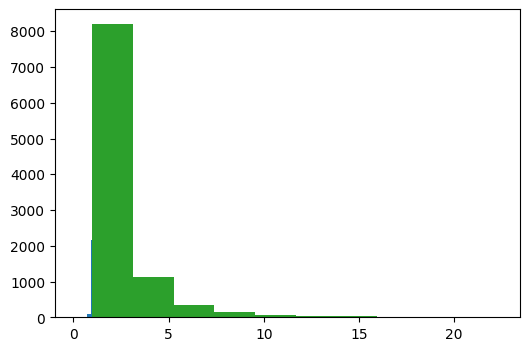

In [4]:
fig, ax = plt.subplots(1,1, figsize=(6,4))

# HANDSON: change beta and study the resulting distribution
mkplot(ax, beta=0.9)
mkplot(ax, beta=0.99)
mkplot(ax, beta=0.999)

# HANDSON: overplot the approximated distribution
ax.plot(betap, pbetap, label='analytical')

ax.legend()
ax.set_ylabel(r"$p(\beta')$")
ax.set_xlabel(r"$\beta'$")
ax.set_xlim(0, 10)
ax.set_ylim(0, 1.5)

Interpretation
* A significant fraction of $\beta'$ may exceed 1, giving the illusion of faster than light motion.
* Increasing $\beta$ (closer to 1) pushes more of the distribution to higher $\beta'$.